import libs

In [32]:
import matplotlib.pyplot as plt
import scipy.signal as sp
import numpy as np

here we will read ECG. each line repesent a single heart beat. after each sample there is "|"

In [33]:
def get_values_from_line(line:str):
    values_str = line.split(sep="|")#return return list of float string values
    
    values =[]
    for i in range(len(values_str) - 1):#len(values_str) -1 because the end entry is "" or "\n"
        values.append(float(values_str[i]))

    return values
   

In [34]:
def get_ECG_data(filePath:str):
    dataFile = open(filePath,'r')
    data = [[]] #I do this to return data in right way

    for line in dataFile.readlines():
        values = get_values_from_line(line)#get samples of each heart beat 
        data.append(values)

    dataFile.close()
    return data[1:]# because first entery is [] we don't need it in the data

In [35]:
def bandpass_filter(data, lowcut = 0.5, highcut= 40.0, fs = 360, order = 4 ):
    # Design Butterworth bandpass filter
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = sp.butter(order, Wn=[low, high], btype='band')

    # Apply the filter
    filtered_data = sp.filtfilt(b, a, data)
    return filtered_data


In [36]:
def get_filtered_data(data, lowcut = 0.5, highcut= 40.0,fs = 360, order = 4):
    filtered_data = []
    for beat in data:
        filtered_data.append(bandpass_filter(data=beat, lowcut=lowcut, highcut=highcut, fs=fs,order=order))
    return filtered_data

In [37]:
def Normalize_Signal(data, check):
    """
    Normalize all sublists in the input data to the range [0, 1] or [-1, 1].

    :param data: A list of lists containing signal data.
    :param check: Integer flag. If 0, normalize to [0, 1]. If 1, normalize to [-1, 1].
    :return: A list of normalized sublists.
    """
    normalized_data = []

    for y in data:
        # Get min and max values in the sublist
        min_element = min(y)
        max_element = max(y)

        if min_element == max_element:
            raise ValueError("Normalization not possible: all values in a sublist are the same.")

        # Normalize based on the check parameter
        if check == 0:
            y_normalized = [(x - min_element) / (max_element - min_element) for x in y]
        else:
            y_normalized = [2 * (x - min_element) / (max_element - min_element) - 1 for x in y]

        normalized_data.append(y_normalized)

    return normalized_data

import our data from files

In [38]:
normal_train = get_ECG_data(r"Data\Normal&PVC\Normal_Train.txt")

print(len(normal_train))
print(normal_train[0])
print(normal_train[-1])
print(len(normal_train[40]))
print(len(normal_train[-1]))


200
[-0.050778, -0.050778, -0.040778, -0.035778, -0.045778, -0.055778, -0.065778, -0.045778, -0.050778, -0.040778, -0.025778, -0.055778, -0.070778, -0.050778, -0.035778, -0.020778, -0.025778, -0.030778, -0.035778, -0.065778, -0.030778, -0.035778, -0.035778, -0.035778, -0.035778, -0.035778, -0.025778, -0.025778, -0.030778, -0.030778, -0.025778, -0.010778, 0.004222, 0.004222, -0.005778, -0.010778, -0.010778, -0.00077803, 0.009222, 0.044222, 0.064222, 0.069222, 0.069222, 0.10922, 0.13922, 0.14422, 0.13422, 0.099222, 0.074222, 0.069222, 0.069222, 0.079222, 0.074222, 0.069222, 0.049222, 0.029222, 0.034222, 0.034222, 0.044222, 0.029222, 0.014222, 0.009222, -0.015778, -0.015778, -0.040778, -0.035778, -0.040778, -0.030778, -0.020778, -0.020778, -0.030778, -0.035778, -0.070778, -0.065778, -0.065778, -0.050778, -0.035778, -0.040778, -0.055778, -0.065778, -0.040778, -0.020778, -0.025778, -0.040778, -0.075778, -0.070778, -0.075778, -0.070778, -0.075778, -0.085778, 0.014222, 0.19922, 0.41922, 0.669

In [39]:
normal_test = get_ECG_data(r"Data\Normal&PVC\Normal_Test.txt")

print(len(normal_test))
print(normal_test[0])
print(normal_test[-1])


200
[-0.013701, -0.023701, -0.018701, -0.008701, -0.003701, 0.001299, 0.001299, -0.003701, 0.006299, 0.001299, 0.016299, 0.006299, 0.006299, 0.001299, 0.001299, 0.016299, 0.026299, 0.011299, 0.001299, -0.008701, 0.001299, 0.011299, 0.016299, 0.026299, 0.036299, 0.031299, 0.031299, 0.036299, 0.056299, 0.056299, 0.051299, 0.081299, 0.086299, 0.1013, 0.1063, 0.1013, 0.091299, 0.076299, 0.086299, 0.081299, 0.081299, 0.081299, 0.076299, 0.071299, 0.066299, 0.071299, 0.086299, 0.096299, 0.1013, 0.061299, 0.021299, 0.021299, 0.006299, -0.003701, -0.023701, -0.023701, -0.018701, -0.008701, -0.013701, -0.008701, -0.018701, -0.033701, -0.038701, -0.033701, -0.033701, -0.043701, -0.038701, -0.048701, -0.023701, -0.028701, -0.023701, -0.013701, -0.038701, -0.048701, -0.033701, -0.023701, -0.018701, -0.023701, -0.043701, -0.058701, -0.053701, -0.073701, -0.1187, -0.1387, -0.1687, -0.2037, -0.2287, -0.1987, -0.1087, 0.006299, 0.1463, 0.2913, 0.5413, 0.7963, 1.0263, 1.1813, 1.2463, 1.2113, 1.0613, 0.

In [40]:
pvc_test = get_ECG_data(r"Data\Normal&PVC\PVC_Test.txt")

print(len(pvc_test))
print(pvc_test[0])
print(pvc_test[-1])


200
[-0.24824, -0.21824, -0.20324, -0.22824, -0.23324, -0.23324, -0.23324, -0.20324, -0.18824, -0.19824, -0.20324, -0.21324, -0.18824, -0.17824, -0.17324, -0.17824, -0.20324, -0.17824, -0.17324, -0.17324, -0.16324, -0.15824, -0.16824, -0.17824, -0.16824, -0.14324, -0.13824, -0.13324, -0.13324, -0.14824, -0.13824, -0.11824, -0.083241, -0.088241, -0.10324, -0.098241, -0.10324, -0.083241, -0.078241, -0.073241, -0.078241, -0.078241, -0.078241, -0.073241, -0.068241, -0.073241, -0.088241, -0.093241, -0.088241, -0.073241, -0.078241, -0.083241, -0.083241, -0.088241, -0.10324, -0.088241, -0.078241, -0.093241, -0.098241, -0.098241, -0.093241, -0.088241, -0.078241, -0.10324, -0.10324, -0.098241, -0.093241, -0.073241, -0.073241, -0.078241, -0.083241, -0.078241, -0.088241, -0.068241, -0.073241, -0.073241, -0.093241, -0.088241, -0.093241, -0.088241, -0.073241, -0.073241, -0.078241, -0.073241, -0.033241, 0.011759, 0.011759, -0.083241, -0.26824, -0.46824, -0.60324, -0.67324, -0.72324, -0.74824, -0.778

In [41]:
pvc_train = get_ECG_data(r"Data\Normal&PVC\PVC_Train.txt")

print(len(pvc_train))
print(pvc_train[0])
print(pvc_train[-1])


200
[0.031147, 0.026147, 0.0061474, 0.0011474, 0.011147, 0.021147, 0.031147, 0.031147, 0.0011474, 0.0011474, -0.013853, 0.0011474, 0.011147, 0.021147, 0.021147, -0.0038526, -0.018853, -0.028853, -0.0088526, 0.0061474, 0.0011474, -0.013853, -0.048853, -0.028853, -0.018853, 0.0011474, -0.0088526, -0.023853, -0.018853, -0.0038526, -0.0038526, 0.0061474, -0.023853, -0.028853, -0.028853, -0.013853, -0.0038526, -0.0038526, -0.023853, -0.033853, -0.033853, -0.0038526, 0.016147, 0.016147, 0.011147, -0.023853, -0.033853, -0.023853, -0.018853, -0.0088526, 0.0061474, -0.0088526, -0.018853, -0.018853, 0.0011474, 0.016147, 0.0011474, -0.0038526, -0.018853, -0.0088526, -0.018853, 0.0011474, -0.013853, -0.013853, -0.0038526, 0.0061474, 0.011147, 0.031147, 0.021147, 0.011147, 0.031147, 0.051147, 0.056147, 0.071147, 0.086147, 0.10115, 0.11115, 0.13615, 0.17115, 0.21615, 0.24615, 0.26115, 0.31115, 0.38615, 0.49615, 0.58615, 0.69615, 0.74115, 0.77115, 0.82615, 0.90115, 0.94615, 1.0111, 1.0511, 1.0911, 1.

plot data before the filter

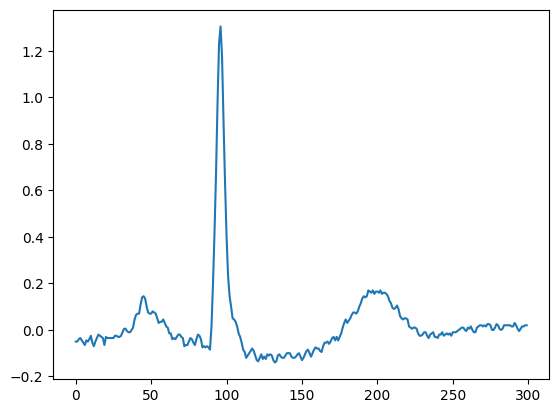

In [42]:
plt.plot(normal_train[0])

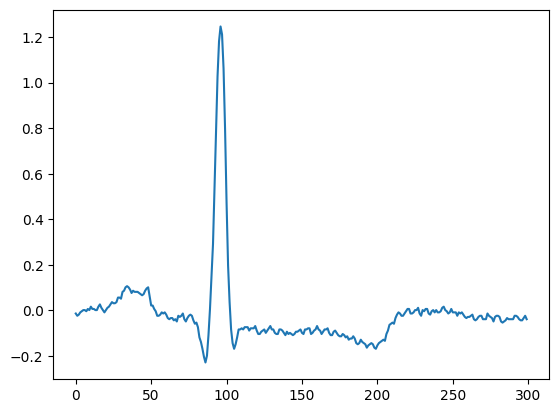

In [43]:
plt.plot(normal_test[0])

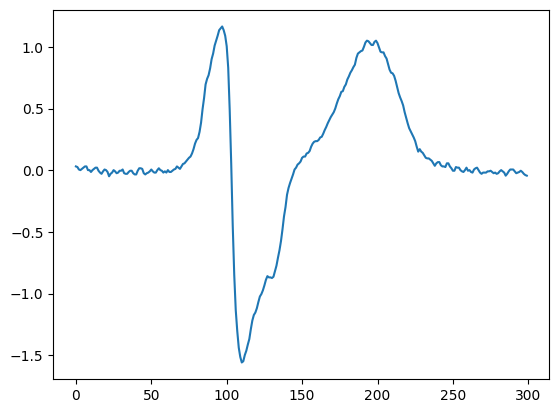

In [44]:
plt.plot(pvc_train[0])

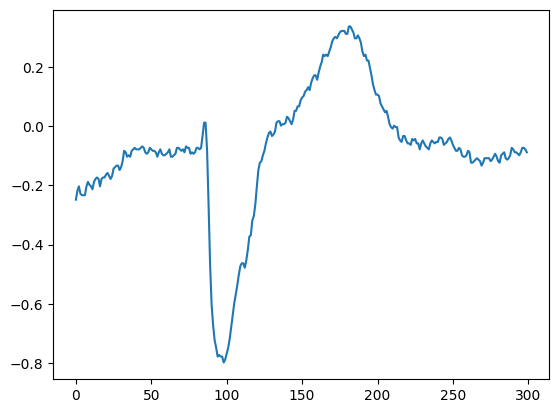

In [45]:
plt.plot(pvc_test[0])

apply bandpass filter on the data

In [46]:
normal_train_filtered = get_filtered_data(normal_train)
normal_test_filtered = get_filtered_data(normal_test)
pvc_train_filtered = get_filtered_data(pvc_train)
pvc_test_filtered = get_filtered_data(pvc_test)

plot after bandpass filter

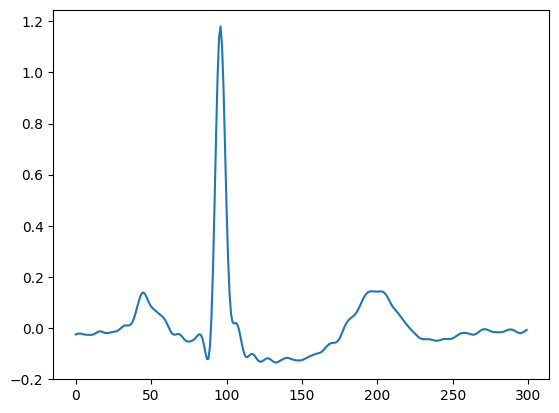

In [47]:
plt.plot(normal_train_filtered[0])

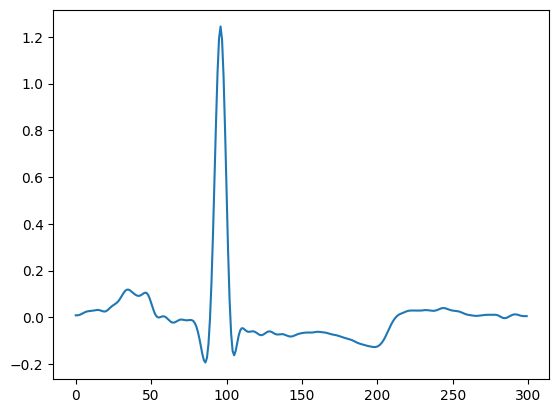

In [48]:
plt.plot(normal_test_filtered[0])

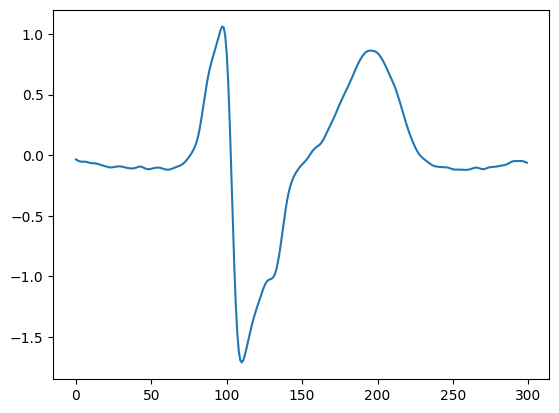

In [49]:
plt.plot(pvc_train_filtered[0])

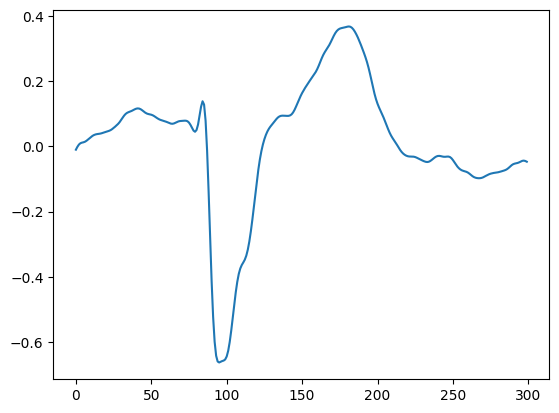

In [50]:
plt.plot(pvc_test_filtered[0])

apply normalize the data

In [51]:
normal_train_filtered_nor = Normalize_Signal(normal_train_filtered, check=1)  # Use check=1 for [-1, 1] normalization
normal_test_filtered_nor = Normalize_Signal(normal_test_filtered, check=1)  # Use check=1 for [-1, 1] normalization
pvc_train_filtered_nor = Normalize_Signal(pvc_train_filtered, check=1)  # Use check=1 for [-1, 1] normalization
pvc_test_filtered_nor = Normalize_Signal(pvc_test_filtered, check=1)  # Use check=1 for [-1, 1] normalization


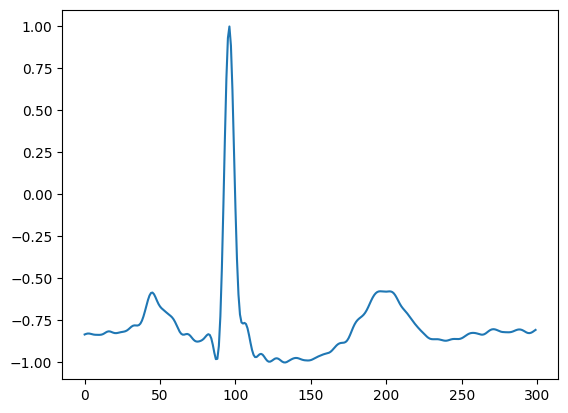

In [52]:
plt.plot(normal_train_filtered_nor[0])

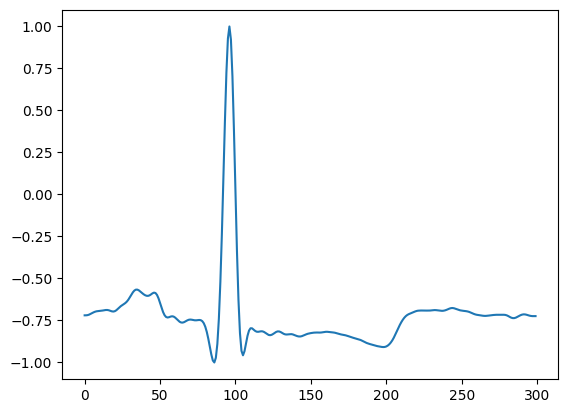

In [53]:
plt.plot(normal_test_filtered_nor[0])

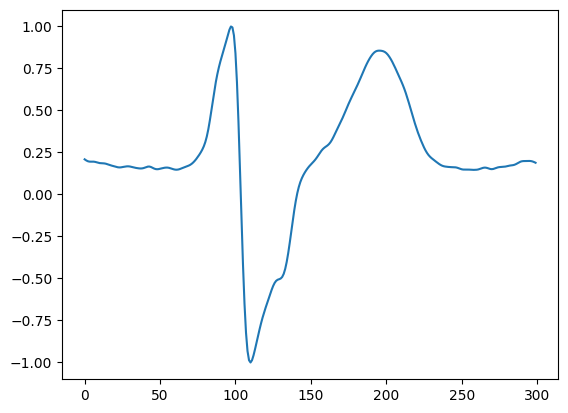

In [54]:
plt.plot(pvc_train_filtered_nor[0])

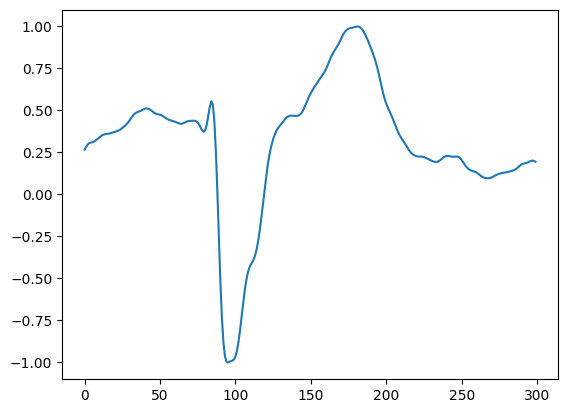

In [55]:
plt.plot(pvc_test_filtered_nor[0])